In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

  Using cached matplotlib-3.10.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp310-cp310-macosx_10_9_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp310-cp310-macosx_10_9_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.2.1-cp310-cp310-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.3-p

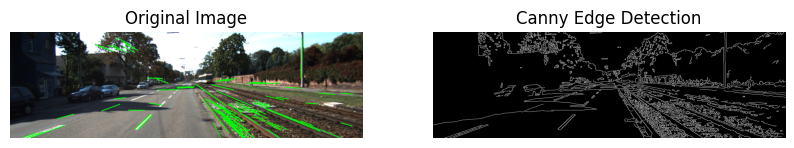

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read sample image
img = cv2.imread('/Users/adityasati/Downloads/raw_data_downloader/2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000039.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Hough transform for line detection
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, 
                         minLineLength=40, maxLineGap=5)

# Draw lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

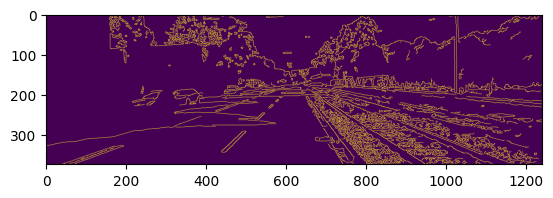

In [9]:
plt.imshow(edges)
plt.show()

In [10]:
def ROI(image):
    height=image.shape[0]
    triangle=np.array([[(10,height),(800,height),(600,150)]])
    mask=np.zeros_like(image)
    cv2.fillPoly(mask,triangle,255)
    return mask

In [12]:
cv2.imshow("Result",ROI(edges))
cv2.waitKey(0)

48

In [1]:
!pip install tensorflow

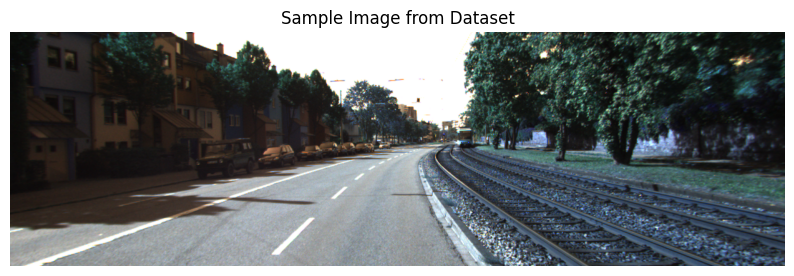

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load an image from the dataset
img = cv2.imread('/Users/adityasati/Downloads/raw_data_downloader/2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000000.png')
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert to RGB for proper display

# Display the imag
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.title('Sample Image from Dataset')
plt.axis('off')
plt.show()

In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
import os

input_dir = "/Users/adityasati/Downloads/raw_data_downloader/2011_09_26/2011_09_26_drive_0001_sync/image_03/data"
output_dir = "/Users/adityasati/Downloads/raw_data_downloader/2011_09_26/2011_09_26_drive_0001_sync/image_03/masks"

os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        path = os.path.join(input_dir, filename)
        img = cv2.imread(path)

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Canny edge detection
        edges = cv2.Canny(gray, 50, 150)

        # Optional: define ROI (region of interest)
        mask = np.zeros_like(edges)
        height, width = edges.shape
        roi = np.array([[(0, height), (width, height), (width, int(height/2)), (0, int(height/2))]])
        cv2.fillPoly(mask, roi, 255)
        masked_edges = cv2.bitwise_and(edges, mask)

        # Save the result as binary mask
        save_path = os.path.join(output_dir, filename.replace(".jpg", ".png"))
        cv2.imwrite(save_path, masked_edges)

In [14]:
import os
import cv2

def load_images_from_folder(folder, size):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv2.resize(img, size)
                images.append(img)
    return np.array(images)

# Paths
input_dir = "/Users/adityasati/Downloads/data_road/training/image_2"  # path to your road images
output_dir = "/"    # path to your binary masks

# Load data
X = load_images_from_folder(input_dir, size=(512, 256))         # Shape: (N, 256, 512, 3)
y = load_images_from_folder(output_dir, size=(512, 256))        # Shape: (N, 256, 512, 3)

# Convert masks to grayscale and squeeze
# Convert masks to grayscale and binarize
y_gray = np.array([cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) for mask in y])

# Normalize mask: turn all non-zero values to 1
y_bin = np.where(y_gray > 127, 1, 0)  # shape: (N, H, W)

# Expand to shape (N, H, W, 1)
y_bin = np.expand_dims(y_bin, axis=-1)

# One-hot encode
y_cat = to_categorical(y_bin, num_classes=2)  # Shape: (N, 256, 512, 1)

# Normalize input and one-hot encode masks
X = X / 255.0

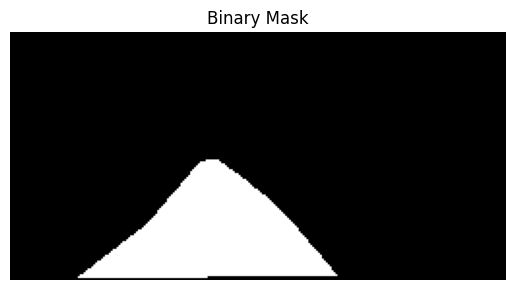

In [2]:
import matplotlib.pyplot as plt

plt.imshow(y[0].squeeze(), cmap='gray')  # squeeze to (H, W) from (H, W, 1)
plt.title("Binary Mask")
plt.axis("off")
plt.show()

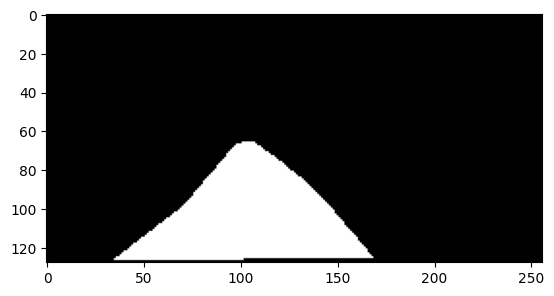

Image shape: (289, 128, 256, 3)
Mask shape (one-hot): (289, 128, 256, 2)


[]

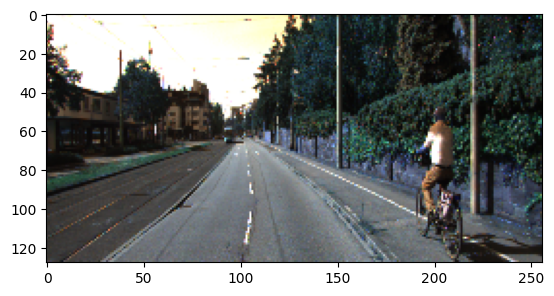

In [3]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

def load_images_from_folder(folder, size, is_mask=False):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, size)

                if is_mask:
                    if img.ndim == 3:
                        img = img[:, :, 0]  # convert to (H, W)
                    img = np.expand_dims(img, axis=-1)  # ensure (H, W, 1)

                images.append(img)

    return np.array(images)

# Set paths
input_dir = "/Users/adityasati/Downloads/data_road/training/image_2"       # Input images
output_dir = "/Users/adityasati/Downloads/data_road/training/gt_image_2"  # Binary mask images

# Load data
X = load_images_from_folder(input_dir, size=(256, 128), is_mask=False)    # Shape: (N, 256, 512, 3)
y = load_images_from_folder(output_dir, size=(256, 128), is_mask=True)    # Shape: (N, 256, 512, 1)

# Normalize images
X = X / 255.0

# One-hot encode masks: convert (N, H, W, 1) -> (N, H, W, 2)
#y_cat = to_categorical(y, num_classes=2)
# If red/purple masks are being read as grayscale or single-channel values:
y = (y > 127).astype(np.uint8)  # Convert to 0 and 1
y = np.squeeze(y, axis=-1)
y_cat = to_categorical(y, num_classes=2)  #
plt.imshow(y[0].squeeze(),cmap='gray')
plt.show()
print("Image shape:", X.shape)
print("Mask shape (one-hot):", y_cat.shape)
plt.imshow(X[0])
plt.plot()

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate,Conv2DTranspose,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define UNet model
def unet_model(input_shape):
    inputs = Input(input_shape)
    s=tf.keras.layers.Lambda(lambda x: x/255)(inputs)

    # Encoder
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(s)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)


    # Decoder
    conv5 = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(conv4)
    merge5 = concatenate([conv3, conv5])
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge5)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)
    up5 = UpSampling2D(size=(2, 2))(conv5)

    conv6 = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(up5)
    merge6 = concatenate([ conv2, conv6])
    conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv6)
    up6 = UpSampling2D(size=(2, 2))(conv6)

    conv7 = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(up6)
    merge7 = concatenate([ conv1, conv7])
    conv7 = Conv2D(16, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv7)


    # Final convolution
    conv8 = Conv2D(2, (1, 1), activation='softmax', padding='same')(conv7)

    model = Model(inputs=inputs, outputs=conv8)

    return model

# Example usage
input_shape = (128, 256, 3)
model = unet_model(input_shape)
model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Assume X is your input images and y is your labeled masks
# Convert labels to categorical one-hot encoding

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, 
                    batch_size=5, 
                    epochs=10, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

2025-06-30 02:05:59.817367: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-06-30 02:05:59.817530: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-06-30 02:05:59.817550: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-06-30 02:05:59.817565: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-30 02:05:59.817574: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128, 256,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 256,  │        448 │ lambda[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 256,  │      2,320 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 128,   │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 128,   │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 128,   │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 64,    │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 32,    │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 64,    │     73,792 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 64,    │          0 │ conv2d_5[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_transpose… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 64,    │     73,792 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 64,    │     36,928 │ conv2d_8[0][0]  

 Total params: 535,810 (2.04 MB)

 Trainable params: 535,810 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-06-30 02:06:01.228297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 527ms/step - accuracy: 0.8218 - loss: 0.6643 - val_accuracy: 0.8154 - val_loss: 0.4765
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 508ms/step - accuracy: 0.8284 - loss: 0.4459 - val_accuracy: 0.8154 - val_loss: 0.3936
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 510ms/step - accuracy: 0.8259 - loss: 0.3497 - val_accuracy: 0.8154 - val_loss: 0.3465
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 508ms/step - accuracy: 0.8240 - loss: 0.3151 - val_accuracy: 0.8154 - val_loss: 0.3280
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 511ms/step - accuracy: 0.8314 - loss: 0.3031 - val_accuracy: 0.8573 - val_loss: 0.3087
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 511ms/step - accuracy: 0.8621 - loss: 0.2944 - val_accuracy: 0.8154 - val_loss: 0.3127
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 510ms/step - accuracy: 0.8610 - loss: 0.2817 - val_accuracy: 0.8567 - val_loss: 0.2975
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 514ms/step - accuracy: 0.8759 - loss: 0.2683 - val_accuracy: 0.888

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step


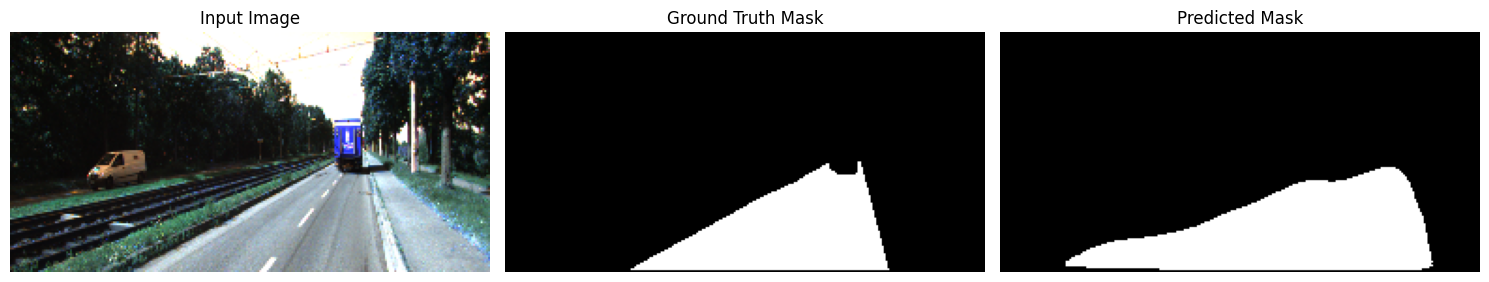

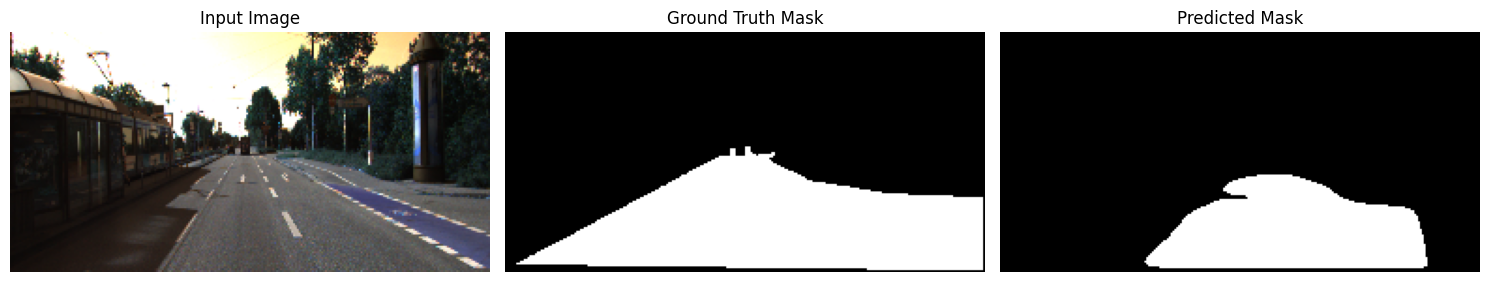

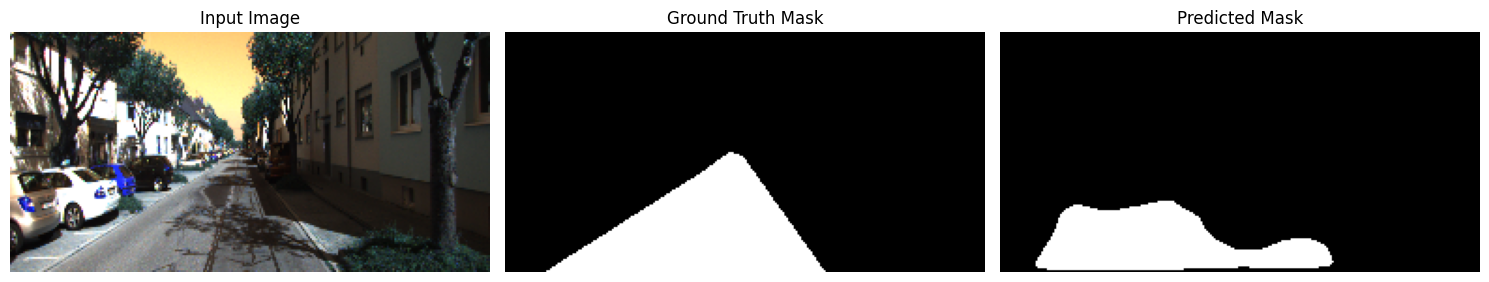

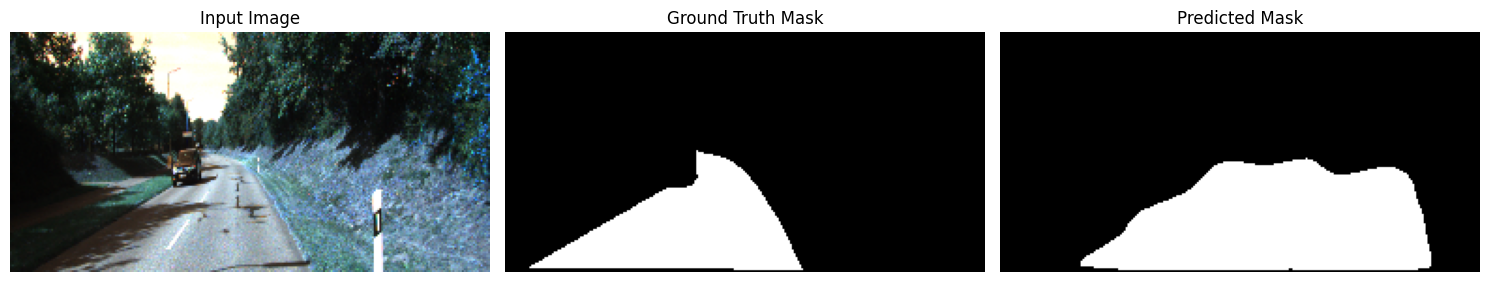

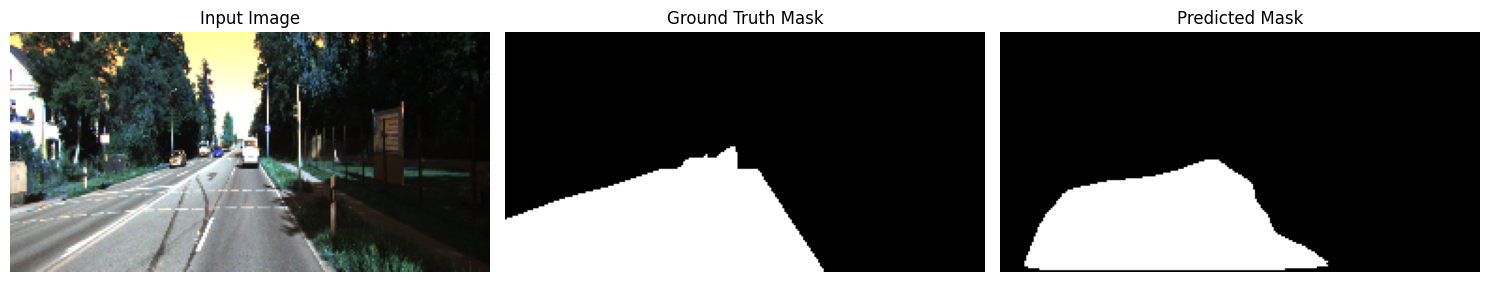

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Predict on validation data
y_pred = model.predict(X_val)

# Step 2: Convert from one-hot to class labels (shape: (H, W))
y_pred_classes = np.argmax(y_pred, axis=-1)   # shape: (N, H, W)
y_true_classes = np.argmax(y_val, axis=-1)    # shape: (N, H, W)

# Step 3: Plot function
def visualize_segmentation(index):
    plt.figure(figsize=(15, 5))
    
    # Original input image
    plt.subplot(1, 3, 1)
    plt.imshow(X_val[index])  # Ensure it's uint8 if normalized
    plt.title("Input Image")
    plt.axis("off")
    
    # Ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(y_true_classes[index],cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis("off")
    
    # Predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(y_pred_classes[index], cmap='gray')
    plt.title("Predicted Mask")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Step 4: Show results for first 5 validation samples
for i in range(5):
    visualize_segmentation(i)

In [6]:
def lane_accuracy(predicted, ground_truth):
    predicted = predicted.cpu().numpy()
    ground_truth = ground_truth.cpu().numpy()
    return accuracy_score(predicted.flatten(), ground_truth.flatten())

def iou_score(predicted, ground_truth):
    return IoU().to('cpu')(predicted, ground_truth)

def rmse(predicted, ground_truth):
    return np.sqrt(np.mean((predicted - ground_truth) ** 2))


In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5,5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Display the original and edge-detected images
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges'), plt.axis('off')
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=200)

# Draw the detected lines on the original image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the output
cv2.imshow('Hough Transform', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
img.shape

(375, 1242, 3)

In [19]:
import numpy as np
import os

# Function to apply random rotation
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

# Function to flip image horizontally
def flip_image(image):
    return cv2.flip(image, 1)

# Example usage
dataset_path = "/Users/adityasati/Downloads/raw_data_downloader/2011_09_26/2011_09_26_drive_0001_sync/image_00/data"
output_path = "/Users/adityasati/Downloads/raw_data_downloader/2011_09_26/2011_09_26_drive_0001_sync/image_00/augmented_data"

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    image = cv2.imread(img_path)
    
    # Generate augmented versions
    rotated = rotate_image(image, 10)  # Rotate by 10 degrees
    flipped = flip_image(image)
    
    # Save augmented images
    cv2.imwrite(os.path.join(output_path, f"rotated_{filename}"), rotated)
    cv2.imwrite(os.path.join(output_path, f"flipped_{filename}"), flipped)

In [20]:
%pip install albumentations

  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.1-py3-none-any.whl.metadata (2.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 1.3 MB/s eta 0:00:0000:0100:01
Using cached pydantic-2.11.7-py3-none-any.whl (444 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.5 MB/s eta 0:00:00a 0:00:01
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached typing_inspection-0.4.1-py3-none-any.whl (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [albumentations]m [pydantic]thon-headless]
Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 924.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [scikit-image] [scikit-image]
Note: you may need to restart the kernel to use updated packages.


In [30]:
from albumentations import Compose, HorizontalFlip, Rotate, Resize, Normalize, RandomBrightnessContrast
from albumentations import Compose
from skimage import io
import os

def preprocess_image(image_path, output_path, size=(224, 224)):
    """
    Preprocess an image by resizing, normalizing, and applying data augmentation.
    
    Args:
        image_path (str): Path to the input image.
        output_path (str): Path to save the preprocessed image.
        size (tuple): Target size for resizing (height, width).
    """
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Apply data augmentation
    augment = Compose([
        Rotate(limit=10, p=0.5),  # Random rotation up to 10 degrees
        HorizontalFlip(p=0.5),  # Horizontal flip with 50% chance
        RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
    ])
    
    # Apply augmentation
    augmented = augment(image=image)["image"]
    
    # Resize the image
    resized = cv2.resize(augmented, size)
    
    # Normalize the image
    normalized = cv2.normalize(resized, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    # Save the preprocessed image
    cv2.imwrite(output_path, normalized * 255)  # Rescale back to 0-255 for saving

# Example usage
dataset_path = "/Users/adityasati/Downloads/raw_data_downloader/2011_09_26/2011_09_26_drive_0001_sync/image_00/data"
output_path = "/Users/adityasati/Downloads/raw_data_downloader/2011_09_26/2011_09_26_drive_0001_sync/image_00/preporceesed_data"

# Process all images in the dataset
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        input_path = os.path.join(dataset_path, filename)
        output_filename = f"preprocessed_{filename}"
        output_fullpath = os.path.join(output_path, output_filename)
        preprocess_image(input_path, output_fullpath)

[ WARN:0@4897.054] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


In [9]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

def load_images_from_folder_input(folder, size, is_mask=False):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith("color.png") or filename.endswith("color.jpg"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, size)

                if is_mask:
                    if img.ndim == 3:
                        img = img[:, :, 0]  # convert to (H, W)
                    img = np.expand_dims(img, axis=-1)  # ensure (H, W, 1)

                images.append(img)

    return np.array(images)
def load_images_from_folder_labels(folder, size, is_mask=False):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith("labelIds.png") or filename.endswith("labelIds.jpg"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, size)

                if is_mask:
                    if img.ndim == 3:
                        img = img[:, :, 0]  # convert to (H, W)
                    img = np.expand_dims(img, axis=-1)  # ensure (H, W, 1)

                images.append(img)

    return np.array(images)

# Set paths
input_dir = "/Users/adityasati/Downloads/gtFine_trainvaltest/gtFine/train/aachen"       # Input images
output_dir = "/Users/adityasati/Downloads/gtFine_trainvaltest/gtFine/train/aachen"  # Binary mask images

# Load data
X = load_images_from_folder_input(input_dir, size=(256, 128), is_mask=False)    # Shape: (N, 256, 512, 3)
y = load_images_from_folder_labels(output_dir, size=(256, 128), is_mask=True)    # Shape: (N, 256, 512, 1)

# Normalize images
X = X / 255.0

# One-hot encode masks: convert (N, H, W, 1) -> (N, H, W, 2)
#y_cat = to_categorical(y, num_classes=2)
# If red/purple masks are being read as grayscale or single-channel values:
 
y_cat = to_categorical(y, num_classes=12)
plt.imshow(y[0],cmap='gray')
plt.show()
print("Image shape:", X.shape)
#print("Mask shape (one-hot):", y_cat.shape)
plt.imshow(X[0])
plt.plot()

IndexError: index 23 is out of bounds for axis 1 with size 12